### Loading log files and creating data frames


In [42]:
# Imports
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Random Log file numbers (400)  {HARDCODED FOR EFFICIENCY AND TESTING}
file_numbers = [16011, 2385, 15407, 5606, 5329, 16689, 9025, 5903, 6458, 11808, 10506, 15727, 368, 5897, 2544, 16788, 9602, 5088, 16948, 1624, 1815, 3710, 17352, 14198, 1455, 8540, 2693, 1692, 12142, 15946, 7743, 5828, 3210, 9623, 3309, 5862, 15515, 17061, 5316, 740, 6778, 7630, 6077, 15017, 7736, 9334, 2072, 17994, 13999, 13271, 8601, 10831, 5183, 8116, 6840, 14999, 17223, 13134, 10123, 16709, 17704, 11989, 16706, 10749, 9170, 2174, 5113, 11753, 14561, 4542, 16326, 16959, 13155, 6379, 8613, 8677, 1819, 2165, 9961, 1377, 3541, 17381, 15091, 10957, 8180, 5084, 488, 8587, 722, 5612, 8114, 11412, 12993, 6862, 3695, 9161, 17297, 2144, 11812, 17871, 497, 9558, 5865, 1284, 12096, 9647, 13974, 17892, 854, 8259, 1370, 1989, 11560, 12484, 6494, 13813, 15400, 7225, 14578, 3584, 1828, 5818, 382, 13599, 10364, 14045, 389, 716, 17967, 11359, 5842, 10807, 4248, 11775, 7086, 8251, 3029, 13776, 5252, 6401, 15292, 9741, 11067, 16985, 13249, 5179, 3739, 13013, 16151, 17935, 13275, 11807, 10835, 2804, 18183, 6246, 11229, 11482, 3887, 6504, 2475, 15999, 4338, 10275, 5431, 9754, 15042, 17776, 7782, 2422, 11343, 615, 4835, 9658, 7187, 16811, 12141, 10897, 17430, 12790, 13457, 10615, 8480, 16655, 11959, 13261, 435, 17966, 5930, 10772, 3784, 3142, 8462, 543, 8660, 10836, 2589, 7132, 2815, 15162, 10154, 16258, 4366, 12120, 14313, 17756, 14473, 11990, 19, 15036, 366, 10161, 15865, 17996, 5607, 5932, 12971, 16809, 12904, 17731, 1286, 7611, 553, 7182, 6337, 11480, 7459, 16102, 3641, 13574, 13560, 16373, 5926, 709, 4292, 18275, 12684, 18148, 16303, 3765, 5347, 14618, 11144, 2308, 5590, 15386, 8756, 7047, 1282, 4892, 2079, 11044, 16693, 6308, 4298, 3553, 5843, 2110, 1734, 13089, 16262, 13186, 384, 14348, 8200, 8261, 14645, 14366, 5433, 16716, 12463, 12236, 12528, 1694, 4198, 7412, 11134, 17347, 3247, 13389, 14296, 17653, 5563, 1687, 11216, 1924, 11843, 14553, 6654, 14529, 17277, 6881, 598, 2497, 2906, 8432, 13589, 2750, 9279, 7127, 4149, 16052, 7912, 11417, 12740, 4345, 15939, 10851, 5227, 9770, 2954, 12929, 10482, 4839, 8017, 784, 10004, 13661, 13810, 17541, 2030, 16923, 10557, 7664, 11954, 545, 15399, 4001, 7002, 12755, 1006, 7770, 2952, 13202, 8119, 16705, 16892, 16692, 10121, 5459, 16395, 9868, 15762, 16720, 5641, 2858, 6542, 6369, 6473, 16712, 9114, 6624, 15362, 6286, 10132, 6479, 11109, 51, 11425, 12941, 14316, 10784, 2092, 18164, 11087, 3877, 15181, 12171, 6373, 12098, 109, 3036, 2338, 1304, 2899, 926, 13246, 1122, 13212, 18067, 10722, 2808, 5002, 2370, 13601, 16511, 14292, 10361, 10390, 9408, 8721, 14094, 3734, 2829, 260, 15802, 17451, 4073, 12829, 12]

# Path of text file including paths of all log files
all_log_files_path = "/content/drive/MyDrive/SEM 06/6SP/all_log_files.txt"

# Creating pandas dataframe of log files from all_log_files.txt with file_numbers number

# List of dataframes
dfs = []

# File number / Line number index
i = 0

# Open the file in read mode
with open(all_log_files_path, 'r') as file:
    # Read the file line by line
    for line in file:
      i += 1
      if i > max(file_numbers):
        break
      if i in file_numbers:
        dfs.append( pd.read_csv(line.strip(),low_memory=False))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dropping empty log file dataframes

In [43]:
len_before_loop = len(dfs)
print('Initial length of dfs = ',len_before_loop)
len_after_loop = -1 # For first run of below loop

while len_before_loop != len_after_loop:
  len_before_loop = len(dfs)
  print("Initial no. of dataframes = ",len_before_loop)
  empty_file_count = 0

  i = -1
  for df in dfs:
    i +=1
    if dfs[i].empty : #if len(df) == 0:
      empty_file_count +=1
      print("Empty file found! Total = ",empty_file_count)
      del dfs[i]

  len_after_loop = len(dfs)
  print("Final no. of dataframes = ",len_after_loop)

Initial length of dfs =  400
Initial no. of dataframes =  400
Empty file found! Total =  1
Empty file found! Total =  2
Empty file found! Total =  3
Empty file found! Total =  4
Empty file found! Total =  5
Empty file found! Total =  6
Empty file found! Total =  7
Empty file found! Total =  8
Empty file found! Total =  9
Empty file found! Total =  10
Empty file found! Total =  11
Empty file found! Total =  12
Empty file found! Total =  13
Empty file found! Total =  14
Empty file found! Total =  15
Empty file found! Total =  16
Empty file found! Total =  17
Empty file found! Total =  18
Empty file found! Total =  19
Empty file found! Total =  20
Empty file found! Total =  21
Empty file found! Total =  22
Empty file found! Total =  23
Empty file found! Total =  24
Empty file found! Total =  25
Empty file found! Total =  26
Final no. of dataframes =  374
Initial no. of dataframes =  374
Empty file found! Total =  1
Empty file found! Total =  2
Empty file found! Total =  3
Empty file found

### Extracting column names from above dfs

In [60]:
# !pip install gensim
import gensim # For processing column names



# Extract column names from each DataFrame
column_names = []
for df in dfs:
    column_names.append(df.columns.tolist())

print(len(column_names))

# Just counting all colmun name words (duplicates included)
col_words = 0
# Creating a txt file with column names {PRE-PROCESSED}
columns_processed_file_path = "/content/drive/MyDrive/SEM 06/6SP/columns_processed_.txt"
# Open the file in write mode
with open(columns_processed_file_path, 'w') as file:
  for cols in column_names:
    for col in cols:
      col = gensim.utils.simple_preprocess(col)
      for c in col:
        file.write(c)
        col_words +=1
        file.write('\n')


print("Column words with duplicates = ", col_words)

360
Column words with duplicates =  403560


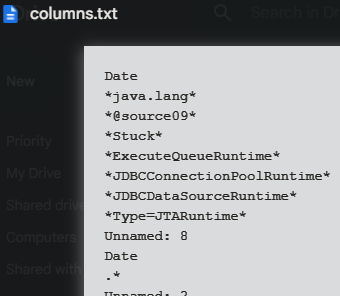


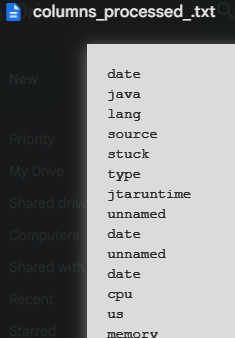

### Creating a set with column name words

In [62]:
# Creating a python set to store column names
columns_set =set()

# Reading column names and adding to the set
with open(columns_processed_file_path, 'r') as file:
    for line in file:
      columns_set.add(line.strip())

print("Column words without duplicates = ", len(columns_set))

print(columns_set)

Column words without duplicates =  134
{'lang', 'uptime', 'cached', 'init', 'jmsbatch', 'space', 'default', 'valid', 'logging', 'code', 'ni', 'totalthreaduse', 'adminserver', 'stuck', 'used', 'pid', 'batchmodules', 'jmsasyncqueue', 'collectioncount', 'weblogic', 'com', 'serverruntime', 'peakusage', 'maxcapacity', 'memorypool', 'processcputime', 'free', 'logbroadcaster', 'ps', 'up', 'cpu', 'deploymentstate', 'wtc', 'memory', 'time', 'total', 'admin', 'jmsdispatcher', 'null', 'process', 'sleeping', 'pr', 'poolstate', 'mxbean', 'virt', 'si', 'st', 'kernel', 'compilation', 'processcpuload', 'runtime', 'peakthreadcount', 'mylast', 'date', 'wa', 'type', 'deltarepeat', 'java', 'usagethreshold', 'non', 'asyncpush', 'rmi', 'threading', 'usage', 'endtime', 'bea', 'gen', 'userlockout', 'tracingaspect', 'committed', 'systemcpuload', 'old', 'source', 'stopped', 'zombie', 'swap', 'server', 'avg', 'system', 'verbose', 'wsat', 'perm', 'tasks', 'users', 'marksweep', 'starttime', 'sys', 'rejector', 'har

Column words with duplicates =  403560 <br>
Column words without duplicates =  134
😃


### Vectorizing all dfs dataframes
### Clustering log files using K-Means clustering

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

# Create a binary vector for each log file indicating the presence or absence of each column name
vectorizer = CountVectorizer(vocabulary=columns_set, binary=True)

# List to store the feature vectors
feature_vectors = []


# Convert each dataframe to a feature vector
for df in dfs:
    # Concatenate column names into a single string
    column_names_str = ' '.join(df.columns)

    # Convert the column names string to a binary vector
    feature_vector = vectorizer.transform([column_names_str])

    # Append the feature vector to the list
    feature_vectors.append(feature_vector.toarray().flatten())

# Perform clustering (example using KMeans)
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k)
cluster_labels = kmeans.fit_predict(feature_vectors)

# Print the clustering results
for i, cluster_label in enumerate(cluster_labels):
    print(f"Log file {i} belongs to Cluster {cluster_label}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Log file 0 belongs to Cluster 4
Log file 1 belongs to Cluster 2
Log file 2 belongs to Cluster 3
Log file 3 belongs to Cluster 3
Log file 4 belongs to Cluster 0
Log file 5 belongs to Cluster 0
Log file 6 belongs to Cluster 2
Log file 7 belongs to Cluster 0
Log file 8 belongs to Cluster 4
Log file 9 belongs to Cluster 0
Log file 10 belongs to Cluster 4
Log file 11 belongs to Cluster 0
Log file 12 belongs to Cluster 4
Log file 13 belongs to Cluster 0
Log file 14 belongs to Cluster 2
Log file 15 belongs to Cluster 2
Log file 16 belongs to Cluster 0
Log file 17 belongs to Cluster 2
Log file 18 belongs to Cluster 2
Log file 19 belongs to Cluster 1
Log file 20 belongs to Cluster 2
Log file 21 belongs to Cluster 0
Log file 22 belongs to Cluster 0
Log file 23 belongs to Cluster 2
Log file 24 belongs to Cluster 2
Log file 25 belongs to Cluster 0
Log file 26 belongs to Cluster 2
Log file 27 belongs to Cluster 3
Log file 28 belongs to Cluster 0
Log file 29 belongs to Cluster 4
Log file 30 belongs 

### Clustering using DBSCAN

In [68]:
from sklearn.cluster import DBSCAN

# Perform clustering using DBSCAN
eps = 0.5  # Maximum distance between samples to be considered in the same neighborhood
min_samples = 2  # Minimum number of samples in a neighborhood to be considered a core point
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(feature_vectors)

# Print the clustering results
for i, cluster_label in enumerate(cluster_labels):
    print(f"Log file {i} belongs to Cluster {cluster_label}")

Log file 0 belongs to Cluster 0
Log file 1 belongs to Cluster 1
Log file 2 belongs to Cluster 2
Log file 3 belongs to Cluster 2
Log file 4 belongs to Cluster 3
Log file 5 belongs to Cluster 3
Log file 6 belongs to Cluster 1
Log file 7 belongs to Cluster 3
Log file 8 belongs to Cluster 0
Log file 9 belongs to Cluster 3
Log file 10 belongs to Cluster 0
Log file 11 belongs to Cluster 3
Log file 12 belongs to Cluster 0
Log file 13 belongs to Cluster 3
Log file 14 belongs to Cluster 1
Log file 15 belongs to Cluster 1
Log file 16 belongs to Cluster 3
Log file 17 belongs to Cluster 4
Log file 18 belongs to Cluster 4
Log file 19 belongs to Cluster 5
Log file 20 belongs to Cluster 4
Log file 21 belongs to Cluster 3
Log file 22 belongs to Cluster 3
Log file 23 belongs to Cluster 1
Log file 24 belongs to Cluster 1
Log file 25 belongs to Cluster 3
Log file 26 belongs to Cluster 1
Log file 27 belongs to Cluster 2
Log file 28 belongs to Cluster 3
Log file 29 belongs to Cluster 0
Log file 30 belongs 